In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

fecha = '05-07'
ds = '../../data/' + fecha + '-dataset.csv'
numerical_ds = '../../data/' + fecha + '-dataset-numerical.csv'

df = pd.read_csv(ds)
df = df.drop(columns=['user','replay','group'])
df_numerical = pd.read_csv(numerical_ds)

df_numerical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   170 non-null    int64  
 1   ActiveTime                   170 non-null    float64
 2   InactiveTime                 170 non-null    float64
 3   CreateShape                  170 non-null    int64  
 4   RotateShape                  170 non-null    int64  
 5   MoveShape                    170 non-null    int64  
 6   ScaleShape                   170 non-null    int64  
 7   DeleteFigure                 170 non-null    int64  
 8   RotateView                   170 non-null    int64  
 9   cube                         170 non-null    int64  
 10  pyramid                      170 non-null    int64  
 11  ramp                         170 non-null    int64  
 12  cylinder                     170 non-null    int64  
 13  cone                

In [7]:
df_numerical['snap_submit'].unique()

array([ 0,  2,  1,  9, 10,  4,  7,  3,  6, 24, 21,  8,  5, 15, 20, 29, 14,
       19], dtype=int64)

Vamos a comprobar cómo de bueno es el modelo usando todos los datos. Si los resultados no son buenos, como se espera, probaremos con un modelo para cada puzle.

In [8]:
X = df_numerical.drop(columns=['spatial_reasoning'])
y = df_numerical['spatial_reasoning']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

The r2 is:  0.72346186737364


c:\Users\ana12\anaconda3\envs\TFGenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


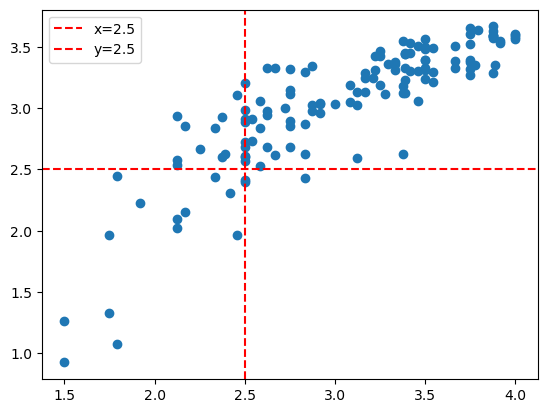

In [9]:
train_pred = model.predict(X_train)
r2 = r2_score(y_train, train_pred)
rmse = mean_squared_error(y_train, train_pred, squared=False)

print('The r2 is: ', r2)

plt.scatter(y_train,train_pred)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='r', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()



The r2 is:  0.6802890424433554


c:\Users\ana12\anaconda3\envs\TFGenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


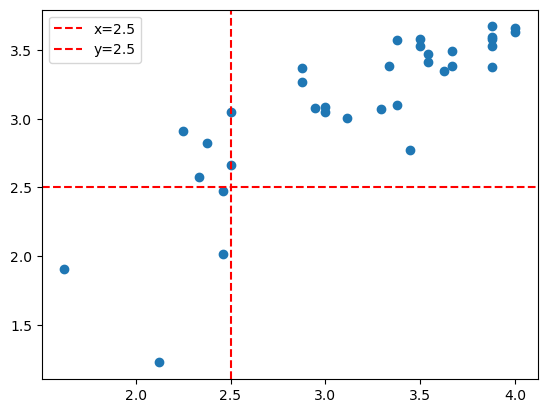

In [10]:
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)

plt.scatter(y_test,predictions)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='r', linestyle='--', label='y=2.5')


# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


Vamos a probar quitando las figuras, puesto que son las características con menos correlación con la variable objetivo.

In [11]:
X = df_numerical.drop(columns=['spatial_reasoning','cube','sphere','ramp','cylinder','cone','pyramid'])
y = df_numerical['spatial_reasoning']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

for i in range(len(y_test)):
    print(y_test.iloc[i], predictions[i])

0.6741069066209422
The r2 is:  0.6741069066209422
The rmse is:  0.35451697664140963
3.5 3.583297145535574
2.458333333333333 2.00635557240786
4.0 3.662399366813422
2.125 1.1755545972751764
4.0 3.634106946010961
3.875 3.674074924219595
2.875 3.3798579396448636
3.5416666666666665 3.4721690123274387
3.0 3.0813152816948444
3.333333333333333 3.378505164669467
2.458333333333333 2.4978926805798665
2.25 2.8989318985274792
3.111111111111111 3.0105992990104684
3.375 3.08375181675696
2.5 3.0251333712138497
3.375 3.574318049011666
3.4444444444444446 2.791073858984745
3.2916666666666665 3.0174496069774213
3.5416666666666665 3.4493187088616537
3.875 3.6011054634749655
2.9444444444444446 3.09276964205061
3.875 3.5175396629851328
3.5 3.526963238658725
3.6666666666666665 3.4971104015165757
3.6666666666666665 3.39565395226208
3.0 3.0442901807816196
3.625 3.3516306175381523
2.375 2.8090981675402737
2.875 3.2384803288625204
2.5 2.724995238386649
2.333333333333333 2.586262815668051
3.875 3.586755322339355
3

c:\Users\ana12\anaconda3\envs\TFGenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


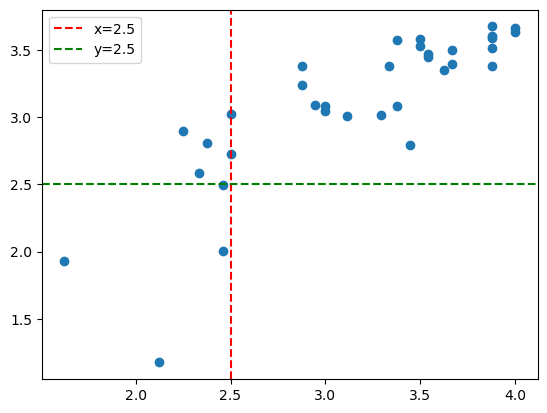

In [12]:
plt.scatter(y_test,predictions)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='g', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


El resultado es muy parecido al anterior: 2 falsos positivos y 1 falso negativo. Vamos a probar con un modelo para cada puzle.

In [14]:
pi_henge = df.loc[df['puzzle']=='Pi Henge']
pi_henge = pi_henge.drop(columns=['puzzle'])
X = pi_henge.drop(columns=['spatial_reasoning'])
y = pi_henge['spatial_reasoning']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.6249842642252346
The rmse is:  0.31412278146578076


c:\Users\ana12\anaconda3\envs\TFGenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


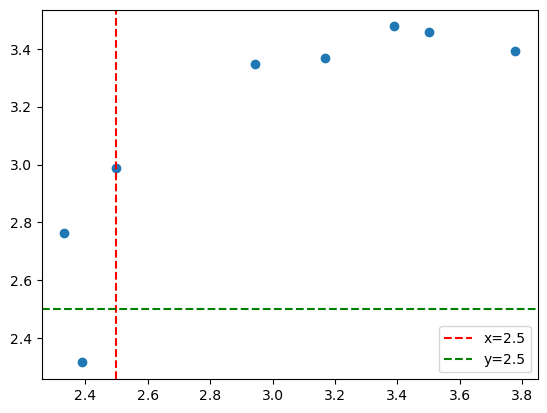

In [15]:
plt.scatter(y_test,predictions)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='g', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [16]:
bird_fez = df.loc[df['puzzle']=='Bird Fez']
bird_fez = bird_fez.drop(columns=['puzzle'])
X = bird_fez.drop(columns=['spatial_reasoning'])
y = bird_fez['spatial_reasoning']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  -0.6624297926302849
The rmse is:  0.4186756452161834


c:\Users\ana12\anaconda3\envs\TFGenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


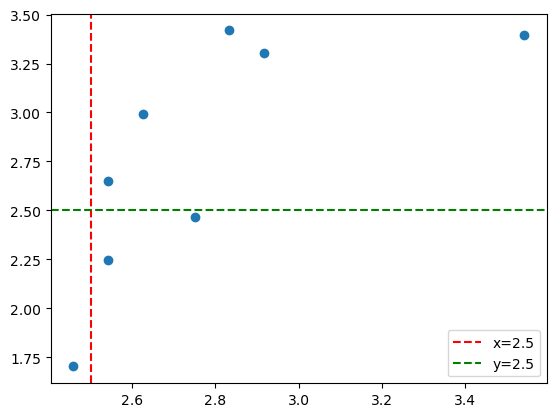

In [17]:
plt.scatter(y_test,predictions)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='g', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [18]:
degree_rotations = df.loc[df['puzzle']=='45-Degree Rotations']
degree_rotations = degree_rotations.drop(columns=['puzzle'])
X = degree_rotations.drop(columns=['spatial_reasoning'])
y = degree_rotations['spatial_reasoning']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.6081444061109167
The rmse is:  0.2880923320069964


c:\Users\ana12\anaconda3\envs\TFGenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


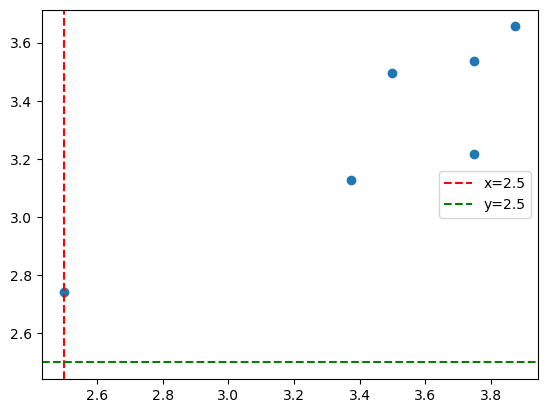

In [19]:
plt.scatter(y_test,predictions)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='g', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [20]:
angled_silhouette = df.loc[df['puzzle']=='Angled Silhouette']
angled_silhouette = angled_silhouette.drop(columns=['puzzle'])
X = angled_silhouette.drop(columns=['spatial_reasoning'])
y = angled_silhouette['spatial_reasoning']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  -5.710492363024752
The rmse is:  0.999824225229264


c:\Users\ana12\anaconda3\envs\TFGenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


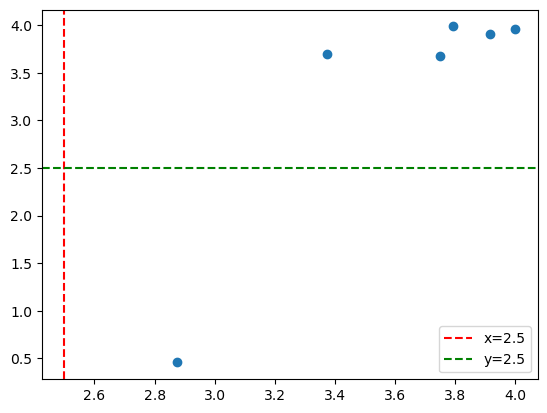

In [21]:
plt.scatter(y_test,predictions)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='g', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [22]:
pyramids = df.loc[df['puzzle']=='Pyramids are Strange']
pyramids = pyramids.drop(columns=['puzzle'])
X = pyramids.drop(columns=['spatial_reasoning'])
y = pyramids['spatial_reasoning']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.6112597014700332
The rmse is:  0.3618042916043923


c:\Users\ana12\anaconda3\envs\TFGenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


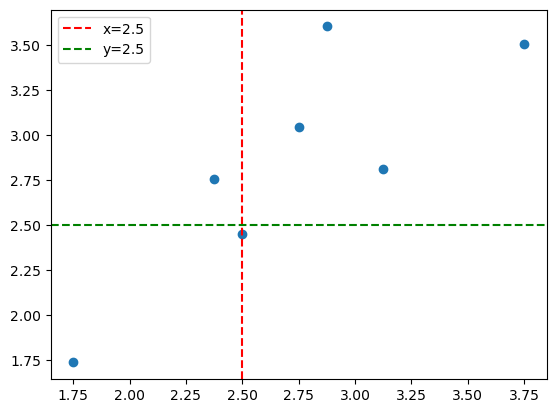

In [23]:
plt.scatter(y_test,predictions)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='g', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


La regresión lineal funciona bastante bien para este problema.